# Imports

In [2]:
%matplotlib inline

import numpy as np
from astropy.table import Table
from matplotlib import pyplot as plt

# Synthetic Fluxes

## Input parameters

Input fake EWs and model parameters for generating the synthetic fluxes

In [97]:
ew = Table.read('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic_flux-EWs', format='ascii', delimiter=' ')
input_param = Table.read('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic_flux-input_params', format='ascii', delimiter=' ')

In [98]:
input_param

y+,Te,log(ne),c(Hb),aH,aHe,tauHe,log(xi)
float64,int64,float64,float64,float64,float64,float64,float64
0.088,16500,2.2,0.1,3.0,0.3,0.5,-2.0
0.088,16500,0.0,0.0,0.0,0.0,0.0,0.0
0.088,16500,2.2,0.1,3.0,0.3,0.5,0.0
0.088,16500,2.2,0.1,3.0,0.3,0.0,-2.0
0.088,16500,2.2,0.1,3.0,0.0,0.5,-2.0
0.088,16500,2.2,0.1,0.0,0.3,0.5,-2.0
0.088,16500,2.2,0.0,3.0,0.3,0.5,-2.0
0.088,16500,0.0,0.1,3.0,0.3,0.5,-2.0


## Load tables

In [99]:
erik = Table.read('/Users/thsyu/Software/Yp/test_data/synthetic/SyntheticFluxes.DAT', format='ascii', delimiter='\t')
ours = Table.read('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic_ours_1e4', format='ascii', delimiter=' ')
#ours_wCR = Table.read('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic_ours_wCR', format='ascii', delimiter=' ')
#ours_1e4 = Table.read('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic_ours_1e4', format='ascii', delimiter=' ')

In [100]:
erik[0:3]

Synthetic,H8+HeI3889,HeI4026,Hd4102,Hg4340,HeI4471,Hb4861,HeI5876,Ha6563,HeI6678,HeI7065,HeI10830
str4,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64
Syn1,0.1669517,0.014090856,0.2234386,0.4334171,0.034539614,1,0.1047526,3.397364,0.030201202,0.0285201,3.724002
Syn2,0.1137611,0.0012994061,0.1894054,0.3793492,0.002675869,1,0.0070080128,5.467042,0.0019774013,0.0015783558,0.2149278
Syn3,0.093445748,0.0010515138,0.1673789,0.3567378,0.0025774788,1,0.0078170402,5.924242,0.0022537301,0.0021282798,0.370975


In [101]:
ours[0:3]

H8+HeI3889,HeI4026,Hd4102,Hg4340,HeI4471,Hb4861,HeI5876,Ha6563,HeI6678,HeI7065,HeI10830
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.16528498896819432,0.014052694648517139,0.22378233373342907,0.43372567772681364,0.03444780882458205,1.0,0.10448152236958416,3.3974908674441,0.030123482024397276,0.028451605176672307,4.103774009386914
0.07622416624784771,0.0012969882560045754,0.189683395873366,0.37952672175159813,0.0026708902556761443,1.0,0.006994973018555967,5.472389575871823,0.0019737222802079413,0.0015754188721798775,2.3751365835127856
0.05952482932454369,0.001048666143745476,0.1676365251660905,0.3569917180509557,0.0025706280356961805,1.0,0.007796813201767683,5.925298572496037,0.0022479301316096142,0.0021231682485279174,4.103774009386914


In [102]:
ours_wCR[0:3]

Synthetic,H8+HeI3889,HeI4026,Hd4102,Hg4340,HeI4471,Hb4861,HeI5876,Ha6563,HeI6678,HeI7065,HeI10830
str4,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
syn1,0.18164788816362637,0.016064729276134386,0.2324694348876293,0.4455982588985144,0.03937997208110822,1.0,0.11944096226433432,3.0063784800284674,0.03443649746047157,0.03252524487770996,4.103774009386914
syn2,0.2141931366580591,0.01984069983636477,0.262931765262365,0.4735838646119156,0.040857988970530036,1.0,0.10700571834950351,2.7806641577675495,0.030193050045484032,0.024099996908032908,2.375136583512785
syn3,0.18139074818730785,0.01604198811383743,0.23237124831840925,0.44546406821829276,0.03932422596046387,1.0,0.11927188214719887,3.0107990551798522,0.03438774930143158,0.032479202279680555,4.103774009386913


In [103]:
ours_1e4[0:3]

Synthetic,H8+HeI3889,HeI4026,Hd4102,Hg4340,HeI4471,Hb4861,HeI5876,Ha6563,HeI6678,HeI7065,HeI10830
str4,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
syn2,0.014001823779074201,0.0012969882560045754,0.189683395873366,0.37952672175159813,0.0026708902556761443,1.0,0.006994973018555967,5.472389575871823,0.0019737222802079413,0.0015754188721798775,2.3751365835127856
syn3,0.011857528821419154,0.001048666143745476,0.1676365251660905,0.3569917180509557,0.0025706280356961805,1.0,0.007796813201767683,5.925298572496037,0.0022479301316096142,0.0021231682485279174,4.103774009386914


## Run comparisons

### Synthetic 1 (all parameters)

H8+HeI3889 0.1669517 0.16528498896819432
HeI4026 0.014090856 0.014052694648517139
Hd4102 0.2234386 0.22378233373342907
Hg4340 0.4334171 0.43372567772681364
HeI4471 0.034539614 0.03444780882458205
Hb4861 1 1.0
HeI5876 0.1047526 0.10448152236958416
Ha6563 3.397364 3.3974908674441
HeI6678 0.030201202 0.030123482024397276
HeI7065 0.0285201 0.028451605176672307
HeI10830 3.724002 4.103774009386914


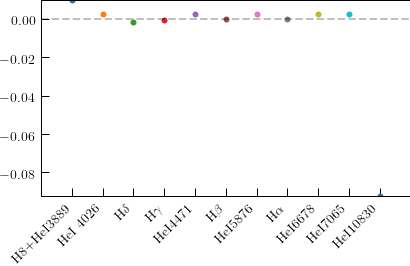

In [104]:
synth_idx = 0 # synthetic2; just emissivities

for c in range(1, len(erik.colnames)):
    col = erik.colnames[c]
    print (col, erik[col][synth_idx], ours[col][synth_idx])
    plt.plot(c, (erik[col][synth_idx]-ours[col][synth_idx])/ours[col][synth_idx], 'o')
plt.axhline(0.0, color='black', alpha=0.25, ls='--')
plt.xticks(np.arange(1, len(erik.colnames), 1), ['H8+HeI3889','HeI 4026', r'H$\delta$',r'H$\gamma$','HeI4471', \
                                                 r'H$\beta$', 'HeI5876',r'H$\alpha$','HeI6678','HeI7065','HeI10830'], \
           rotation=45, ha='right')
plt.xlim(0, len(erik.colnames))
plt.ylim()
plt.show()

### Synthetic 2 (just y+, T)

H8+HeI3889 0.1137611 0.07622416624784771
HeI4026 0.0012994061 0.0012969882560045754
Hd4102 0.1894054 0.189683395873366
Hg4340 0.3793492 0.37952672175159813
HeI4471 0.002675869 0.0026708902556761443
Hb4861 1 1.0
HeI5876 0.0070080128 0.006994973018555967
Ha6563 5.467042 5.472389575871823
HeI6678 0.0019774013 0.0019737222802079413
HeI7065 0.0015783558 0.0015754188721798775
HeI10830 0.2149278 2.3751365835127856


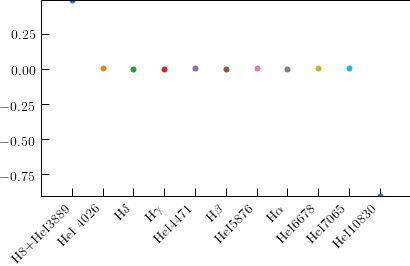

In [105]:
synth_idx = 1 # synthetic2; just emissivities

for c in range(1, len(erik.colnames)):
    col = erik.colnames[c]
    print (col, erik[col][synth_idx], ours[col][synth_idx])
    plt.plot(c, (erik[col][synth_idx]-ours[col][synth_idx])/ours[col][synth_idx], 'o')
plt.xticks(np.arange(1, len(erik.colnames), 1), ['H8+HeI3889','HeI 4026', r'H$\delta$',r'H$\gamma$','HeI4471', \
                                                 r'H$\beta$', 'HeI5876',r'H$\alpha$','HeI6678','HeI7065','HeI10830'], \
           rotation=45, ha='right')
plt.xlim(0, len(erik.colnames))
plt.show()

In [106]:
for c in range(1, len(erik.colnames)):
    col = erik.colnames[c]
    print (col, (erik[col][0]-ours[col][0])/ours[col][0])

H8+HeI3889 0.01008386207489422
HeI4026 0.0027155896030864697
Hd4102 -0.0015360181820185056
Hg4340 -0.0007114582849484924
HeI4471 0.0026650512340407246
Hb4861 0.0
HeI5876 0.0025945030687526916
Ha6563 -3.734151144176442e-05
HeI6678 0.0025800462091260866
HeI7065 0.002407415079127151
HeI10830 -0.09254213524385818


/Users/thsyu/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
/Users/thsyu/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


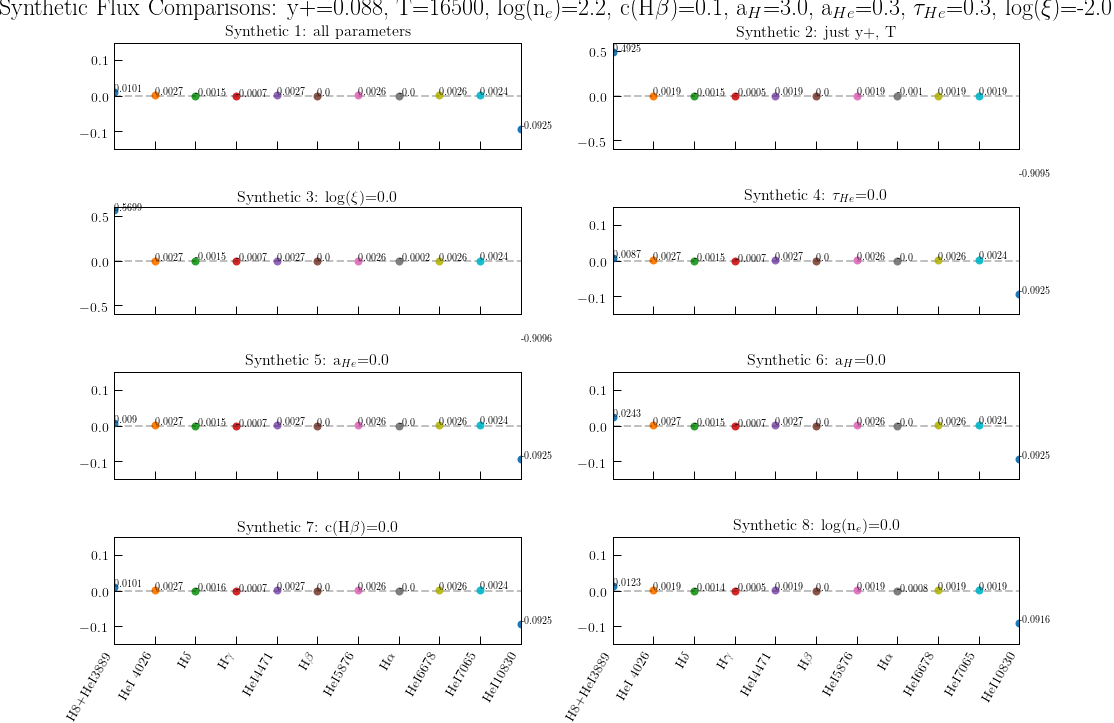

In [109]:
f, ax = plt.subplots(4,2, figsize=(14, 10), sharex=True)

for c in range(1, len(erik.colnames)):
    col = erik.colnames[c]
    ax[0,0].plot(c, (erik[col][0]-ours[col][0])/ours[col][0], marker='o', markersize=8)
    ax[0,0].text(c, (erik[col][0]-ours[col][0])/ours[col][0], str(round((erik[col][0]-ours[col][0])/ours[col][0], 4)))
    ax[0,0].axhline(0.0, color='black', alpha=0.025, ls='--')
    ax[0,0].set_xticks(np.arange(1, len(erik.colnames), 1))
    ax[0,0].set_title('Synthetic 1: all parameters')
    ax[0,0].set_ylim(-0.15, 0.15)
    ax[0,1].plot(c, (erik[col][1]-ours[col][1])/ours[col][1], marker='o', markersize=8)
    ax[0,1].text(c, (erik[col][1]-ours[col][1])/ours[col][1], str(round((erik[col][1]-ours[col][1])/ours[col][1], 4)))
    ax[0,1].axhline(0.0, color='black', alpha=0.025, ls='--')
    ax[0,1].set_xticks(np.arange(1, len(erik.colnames), 1))
    ax[0,1].set_title('Synthetic 2: just y+, T')
    ax[0,1].set_ylim(-0.6, 0.6)
    ax[1,0].plot(c, (erik[col][2]-ours[col][2])/ours[col][2], marker='o', markersize=8)
    ax[1,0].text(c, (erik[col][2]-ours[col][2])/ours[col][2], str(round((erik[col][2]-ours[col][2])/ours[col][2], 4)))
    ax[1,0].axhline(0.0, color='black', alpha=0.025, ls='--')
    ax[1,0].set_xticks(np.arange(1, len(erik.colnames), 1))
    ax[1,0].set_title(r'Synthetic 3: log($\xi$)=0.0')
    ax[1,0].set_ylim(-0.6, 0.6)
    ax[1,1].plot(c, (erik[col][3]-ours[col][3])/ours[col][3], marker='o', markersize=8)
    ax[1,1].text(c, (erik[col][3]-ours[col][3])/ours[col][3], str(round((erik[col][3]-ours[col][3])/ours[col][3], 4)))
    ax[1,1].axhline(0.0, color='black', alpha=0.025, ls='--')
    ax[1,1].set_xticks(np.arange(1, len(erik.colnames), 1))
    ax[1,1].set_title(r'Synthetic 4: $\tau_{He}$=0.0')
    ax[1,1].set_ylim(-0.15, 0.15)
    ax[2,0].plot(c, (erik[col][4]-ours[col][4])/ours[col][4], marker='o', markersize=8)
    ax[2,0].text(c, (erik[col][4]-ours[col][4])/ours[col][4], str(round((erik[col][4]-ours[col][4])/ours[col][4], 4)))
    ax[2,0].axhline(0.0, color='black', alpha=0.025, ls='--')
    ax[2,0].set_xticks(np.arange(1, len(erik.colnames), 1))
    ax[2,0].set_title(r'Synthetic 5: a$_{He}$=0.0')
    ax[2,0].set_ylim(-0.15, 0.15)
    ax[2,1].plot(c, (erik[col][5]-ours[col][5])/ours[col][5], marker='o', markersize=8)
    ax[2,1].text(c, (erik[col][5]-ours[col][5])/ours[col][5], str(round((erik[col][5]-ours[col][5])/ours[col][5], 4)))
    ax[2,1].axhline(0.0, color='black', alpha=0.025, ls='--')
    ax[2,1].set_xticks(np.arange(1, len(erik.colnames), 1))
    ax[2,1].set_title(r'Synthetic 6: a$_{H}$=0.0')
    ax[2,1].set_ylim(-0.15, 0.15)
    ax[3,0].plot(c, (erik[col][6]-ours[col][6])/ours[col][6], marker='o', markersize=8)
    ax[3,0].text(c, (erik[col][6]-ours[col][6])/ours[col][6], str(round((erik[col][6]-ours[col][6])/ours[col][6], 4)))
    ax[3,0].axhline(0.0, color='black', alpha=0.025, ls='--')
    ax[3,0].set_xticks(np.arange(1, len(erik.colnames), 1))
    ax[3,0].set_title(r'Synthetic 7: c(H$\beta$)=0.0')
    ax[3,0].set_ylim(-0.15, 0.15)
    ax[3,0].set_xticklabels(['H8+HeI3889','HeI 4026', r'H$\delta$',r'H$\gamma$','HeI4471', \
                            r'H$\beta$', 'HeI5876',r'H$\alpha$','HeI6678','HeI7065','HeI10830'], rotation=60, ha='right')
    ax[3,1].plot(c, (erik[col][7]-ours[col][7])/ours[col][7], marker='o', markersize=8)
    ax[3,1].text(c, (erik[col][7]-ours[col][7])/ours[col][7], str(round((erik[col][7]-ours[col][7])/ours[col][7], 4)))
    ax[3,1].axhline(0.0, color='black', alpha=0.025, ls='--')
    ax[3,1].set_xticks(np.arange(1, len(erik.colnames), 1))
    ax[3,1].set_title(r'Synthetic 8: log(n$_{e}$)=0.0')
    ax[3,1].set_ylim(-0.15, 0.15)
    ax[3,1].set_xticklabels(['H8+HeI3889','HeI 4026', r'H$\delta$',r'H$\gamma$','HeI4471', \
                            r'H$\beta$', 'HeI5876',r'H$\alpha$','HeI6678','HeI7065','HeI10830'], rotation=60, ha='right')
f.suptitle(r'Synthetic Flux Comparisons: y+=0.088, T=16500, log(n$_{e}$)=2.2, c(H$\beta$)=0.1, a$_{H}$=3.0, a$_{He}$=0.3, $\tau_{He}$=0.3, log($\xi$)=-2.0', y=1.02, fontsize=24)
#f.savefig('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic_flux-comparison.pdf', overwrite=True)
f.show()

In [45]:
ours_wCR

Synthetic,H8+HeI3889,HeI4026,Hd4102,Hg4340,HeI4471,Hb4861,HeI5876,Ha6563,HeI6678,HeI7065,HeI10830
str4,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
syn1,0.18164788816362637,0.016064729276134386,0.2324694348876293,0.4455982588985144,0.03937997208110822,1.0,0.11944096226433432,3.0063784800284674,0.03443649746047157,0.03252524487770996,4.103774009386914
syn2,0.2141931366580591,0.01984069983636477,0.262931765262365,0.4735838646119156,0.040857988970530036,1.0,0.10700571834950351,2.7806641577675495,0.030193050045484032,0.024099996908032908,2.375136583512785
syn3,0.18139074818730785,0.01604198811383743,0.23237124831840925,0.44546406821829276,0.03932422596046387,1.0,0.11927188214719887,3.0107990551798522,0.03438774930143158,0.032479202279680555,4.103774009386913
syn4,0.18436677807928023,0.016056268655301173,0.2324694348876293,0.4455982588985144,0.03934183778129581,1.0,0.11921079255506095,3.0063784800284674,0.03443649746047157,0.03049440787831983,4.0940751699589955
syn5,0.18546089308937158,0.019310607826377342,0.2324694348876293,0.4455982588985144,0.04134897068516363,1.0,0.12036206286156105,3.0063784800284674,0.03488847648964026,0.032850497326487066,4.106365866656001
syn6,0.1983484851631651,0.015827319483876248,0.24955536576705512,0.45705649984161906,0.03879800205035293,1.0,0.1176758248909698,2.969227909717111,0.033927583704898095,0.032044576234197014,4.0732248232128185
syn7,0.19403739977146195,0.017020802210973473,0.2450940349293627,0.46195751820194025,0.040438988745064054,1.0,0.11398684385577026,2.8073205152317136,0.032043370004389005,0.029907887870153634,4.1083363520920875
syn8,0.177764991772832,0.01584297966571196,0.23241202355034307,0.44549490857767754,0.03855661802189118,1.0,0.11333365066716627,3.0106633549406716,0.032554123458459545,0.02836497704669662,2.402004760678303


In [46]:
for c in range(1, len(ours_wCR.colnames)):
    col = ours_wCR.colnames[c]
    print (col, (ours_wCR[col][1]-ours[col][1])/ours[col][1])

H8+HeI3889 -0.001429894684945133
HeI4026 -0.0014298946849450717
Hd4102 -0.0004266339324899093
Hg4340 -0.0003041925477979868
HeI4471 -0.0014298946849451292
Hb4861 0.0
HeI5876 -0.0014298946849451365
Ha6563 0.0014852946199332394
HeI6678 -0.0014298946849451099
HeI7065 -0.0014298946849451582
HeI10830 0.0


/Users/thsyu/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


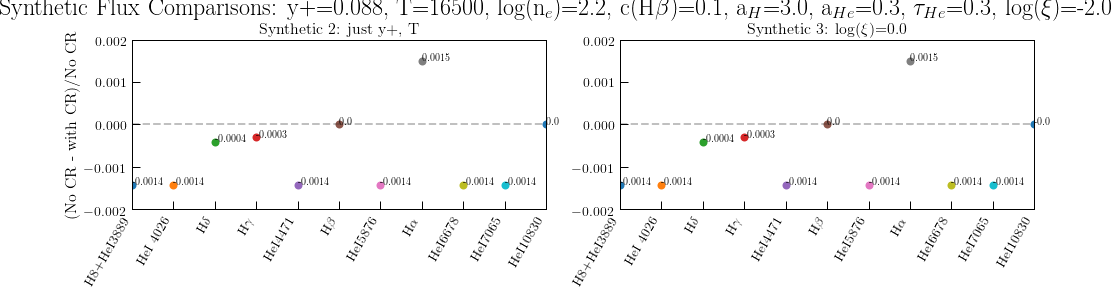

In [55]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(14, 4))

for c in range(1, len(ours_wCR.colnames)):
    col = ours_wCR.colnames[c]
    ax1.plot(c, (ours_wCR[col][1]-ours[col][1])/ours[col][1], marker='o', markersize=8)
    ax1.text(c, (ours_wCR[col][1]-ours[col][1])/ours[col][1], str(round((ours_wCR[col][1]-ours[col][1])/ours[col][1], 4)))
    ax1.axhline(0.0, color='black', alpha=0.025, ls='--')
    ax1.set_xticks(np.arange(1, len(ours_wCR.colnames), 1))
    ax1.set_title('Synthetic 2: just y+, T')
    ax1.set_ylim(-0.002, 0.002)
    ax1.set_xticklabels(['H8+HeI3889','HeI 4026', r'H$\delta$',r'H$\gamma$','HeI4471', \
                            r'H$\beta$', 'HeI5876',r'H$\alpha$','HeI6678','HeI7065','HeI10830'], rotation=60, ha='right')
    ax1.set_ylabel('(No CR - with CR)/No CR')
    ax2.plot(c, (ours_wCR[col][2]-ours[col][2])/ours[col][2], marker='o', markersize=8)
    ax2.text(c, (ours_wCR[col][2]-ours[col][2])/ours[col][2], str(round((ours_wCR[col][2]-ours[col][2])/ours[col][2], 4)))
    ax2.axhline(0.0, color='black', alpha=0.025, ls='--')
    ax2.set_xticks(np.arange(1, len(ours_wCR.colnames), 1))
    ax2.set_title(r'Synthetic 3: log($\xi$)=0.0')
    ax2.set_ylim(-0.002, 0.002)
    ax2.set_xticklabels(['H8+HeI3889','HeI 4026', r'H$\delta$',r'H$\gamma$','HeI4471', \
                            r'H$\beta$', 'HeI5876',r'H$\alpha$','HeI6678','HeI7065','HeI10830'], rotation=60, ha='right')
f.suptitle(r'Synthetic Flux Comparisons: y+=0.088, T=16500, log(n$_{e}$)=2.2, c(H$\beta$)=0.1, a$_{H}$=3.0, a$_{He}$=0.3, $\tau_{He}$=0.3, log($\xi$)=-2.0', y=1.04, fontsize=24)
#f.savefig('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic_flux-CR_comparison.pdf', overwrite=True)
f.show()

### Not as percent difference

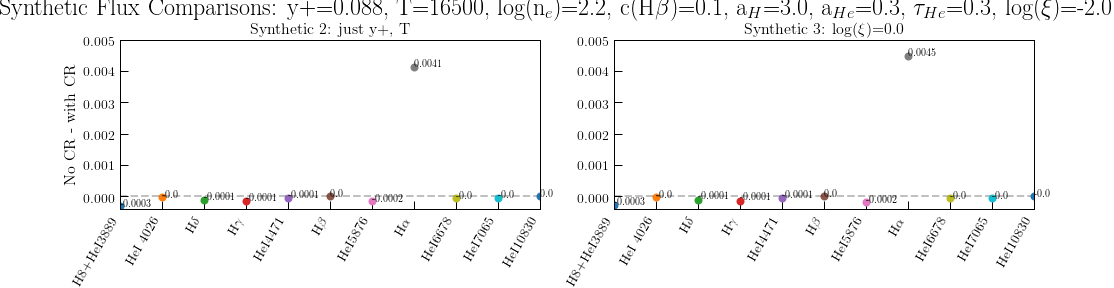

In [65]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(14, 4))

for c in range(1, len(ours_wCR.colnames)):
    col = ours_wCR.colnames[c]
    ax1.plot(c, (ours_wCR[col][1]-ours[col][1]), marker='o', markersize=8)
    ax1.text(c, (ours_wCR[col][1]-ours[col][1]), str(round((ours_wCR[col][1]-ours[col][1]), 4)))
    ax1.axhline(0.0, color='black', alpha=0.025, ls='--')
    ax1.set_xticks(np.arange(1, len(ours_wCR.colnames), 1))
    ax1.set_title('Synthetic 2: just y+, T')
    ax1.set_ylim(-0.0004, 0.005)
    ax1.set_xticklabels(['H8+HeI3889','HeI 4026', r'H$\delta$',r'H$\gamma$','HeI4471', \
                            r'H$\beta$', 'HeI5876',r'H$\alpha$','HeI6678','HeI7065','HeI10830'], rotation=60, ha='right')
    ax1.set_ylabel('No CR - with CR')
    ax2.plot(c, (ours_wCR[col][2]-ours[col][2]), marker='o', markersize=8)
    ax2.text(c, (ours_wCR[col][2]-ours[col][2]), str(round((ours_wCR[col][2]-ours[col][2]), 4)))
    ax2.axhline(0.0, color='black', alpha=0.025, ls='--')
    ax2.set_xticks(np.arange(1, len(ours_wCR.colnames), 1))
    ax2.set_title(r'Synthetic 3: log($\xi$)=0.0')
    ax2.set_ylim(-0.0004, 0.005)
    ax2.set_xticklabels(['H8+HeI3889','HeI 4026', r'H$\delta$',r'H$\gamma$','HeI4471', \
                            r'H$\beta$', 'HeI5876',r'H$\alpha$','HeI6678','HeI7065','HeI10830'], rotation=60, ha='right')
f.suptitle(r'Synthetic Flux Comparisons: y+=0.088, T=16500, log(n$_{e}$)=2.2, c(H$\beta$)=0.1, a$_{H}$=3.0, a$_{He}$=0.3, $\tau_{He}$=0.3, log($\xi$)=-2.0', y=1.04, fontsize=24)
#f.savefig('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic_flux-CR_comparison.pdf', overwrite=True)
f.show()

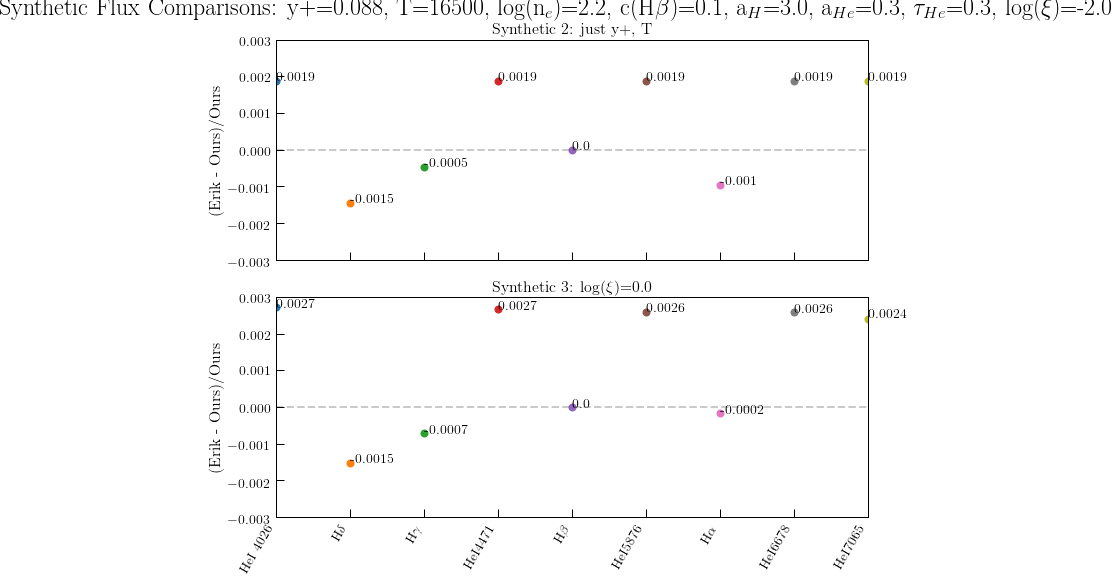

In [84]:
f, (ax1, ax2) = plt.subplots(2,1, figsize=(10,8), sharex=True)

for c in range(2, len(erik.colnames)-1):
    col = erik.colnames[c]
    ax1.plot(c, (erik[col][1]-ours_1e4[col][0])/ours_1e4[col][0], marker='o', markersize=8)
    ax1.text(c, (erik[col][1]-ours_1e4[col][0])/ours_1e4[col][0], str(round((erik[col][1]-ours_1e4[col][0])/ours_1e4[col][0], 4)), fontsize=14)
    ax1.axhline(0.0, color='black', alpha=0.025, ls='--')
    ax1.set_xticks(np.arange(2, len(erik.colnames)-1, 1))
    ax1.set_title('Synthetic 2: just y+, T')
    ax1.set_ylim(-0.003, 0.003)
    ax1.set_ylabel('(Erik - Ours)/Ours')
    ax1.set_xticklabels(['HeI 4026', r'H$\delta$',r'H$\gamma$','HeI4471', \
                            r'H$\beta$', 'HeI5876',r'H$\alpha$','HeI6678','HeI7065'], rotation=60, ha='right')
    ax2.plot(c, (erik[col][2]-ours_1e4[col][1])/ours_1e4[col][1], marker='o', markersize=8)
    ax2.text(c, (erik[col][2]-ours_1e4[col][1])/ours_1e4[col][1], str(round((erik[col][2]-ours_1e4[col][1])/ours_1e4[col][1], 4)), fontsize=14)
    ax2.axhline(0.0, color='black', alpha=0.025, ls='--')
    ax2.set_xticks(np.arange(2, len(erik.colnames)-1, 1))
    ax2.set_title(r'Synthetic 3: log($\xi$)=0.0')
    ax2.set_ylim(-0.003, 0.003)
    ax2.set_ylabel('(Erik - Ours)/Ours')
    ax2.set_xticklabels(['HeI 4026', r'H$\delta$',r'H$\gamma$','HeI4471', \
                            r'H$\beta$', 'HeI5876',r'H$\alpha$','HeI6678','HeI7065'], rotation=60, ha='right')
f.suptitle(r'Synthetic Flux Comparisons: y+=0.088, T=16500, log(n$_{e}$)=2.2, c(H$\beta$)=0.1, a$_{H}$=3.0, a$_{He}$=0.3, $\tau_{He}$=0.3, log($\xi$)=-2.0', y=1.02, fontsize=24)
f.savefig('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic23-comparison.pdf', overwrite=True)
f.show()

# Putting synthetic runs into one table

In [96]:
s1 = Table.read('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic1_wCR1e4', format='ascii', delimiter=' ')
s2 = Table.read('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic2_wCR1e4', format='ascii', delimiter=' ')
s3 = Table.read('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic3_wCR1e4', format='ascii', delimiter=' ')
s4 = Table.read('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic4_wCR1e4', format='ascii', delimiter=' ')
s5 = Table.read('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic5_wCR1e4', format='ascii', delimiter=' ')
s6 = Table.read('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic6_wCR1e4', format='ascii', delimiter=' ')
s7 = Table.read('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic7_wCR1e4', format='ascii', delimiter=' ')
s8 = Table.read('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic8_wCR1e4', format='ascii', delimiter=' ')

data = np.array([(s1['Flux Ratio']), (s2['Flux Ratio']), (s3['Flux Ratio']), (s4['Flux Ratio']), 
                 (s5['Flux Ratio']), (s6['Flux Ratio']), (s7['Flux Ratio']), (s8['Flux Ratio']) ])
tbl = Table(rows=data, names=('H8+HeI3889','HeI4026','Hd4102','Hg4340','HeI4471',\
      'Hb4861','HeI5876','Ha6563','HeI6678','HeI7065','HeI10830'))
tbl.write('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic_ours_1e4', format='ascii', delimiter=' ')